In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [5]:
print("Total :\n",df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [33]:

review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

In [7]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
print(df.describe())
print("Total :\n", df['sentiment'].value_counts())

review = []  # List to store reviews
sentences = list(df['review'])  # Extract reviews from the DataFrame
for sen in sentences:
    review.append(sen)


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [9]:
import numpy as np 
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [10]:

from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [11]:

from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split (review, labels, test_size=0.20)

In [12]:

# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type='post' 
oov_tok = "<00V>"

In [15]:
pip install tensorflow



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install keras-preprocessing



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install keras


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer (num_words = vocab_size, oov_token=oov_tok)
# Generate the word index dictionary for the training sentences 
tokenizer.fit_on_texts(train_sentences) 
word_index = tokenizer.word_index
# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences (test_sequences,maxlen=max_length, truncating=trunc_type)

In [29]:
from tensorflow import keras

# Build the model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense (64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
# Setup the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6846 - loss: 0.5579 - val_accuracy: 0.8017 - val_loss: 0.4293
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8299 - loss: 0.3762 - val_accuracy: 0.7990 - val_loss: 0.4332
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8658 - loss: 0.3124 - val_accuracy: 0.7928 - val_loss: 0.4756
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9066 - loss: 0.2320 - val_accuracy: 0.7791 - val_loss: 0.5329
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9374 - loss: 0.1688 - val_accuracy: 0.7739 - val_loss: 0.6407
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9636 - loss: 0.1089 - val_accuracy: 0.7673 - val_loss: 0.7940
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9806 - loss: 0.0678 - val_accuracy: 0.7624 - val_loss: 1.0209
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9907 - loss: 0.0396

<Axes: >

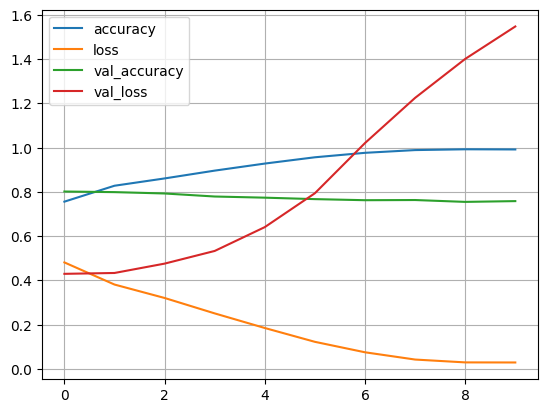

In [32]:

# Train the model
history = model.fit(padded,
                    train_labels,
                    epochs=10,
                    validation_data=(test_padded, test_labels))
# Graficar el historial de entrenamiento: 
pd.DataFrame(history.history).plot(grid=True)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7028 - loss: 0.5321 - val_accuracy: 0.8226 - val_loss: 0.3884
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8643 - loss: 0.3155 - val_accuracy: 0.8246 - val_loss: 0.3984
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9140 - loss: 0.2134 - val_accuracy: 0.8160 - val_loss: 0.4519
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9566 - loss: 0.1222 - val_accuracy: 0.8102 - val_loss: 0.5881
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9796 - loss: 0.0647 - val_accuracy: 0.8054 - val_loss: 0.7816
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9905 - loss: 0.0323 - val_accuracy: 0.7983 - val_loss: 1.0513
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9918 - loss: 0.0245 - val_accuracy: 0.7987 - val_loss: 1.1787
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9936 - loss: 0.0214

<Axes: >

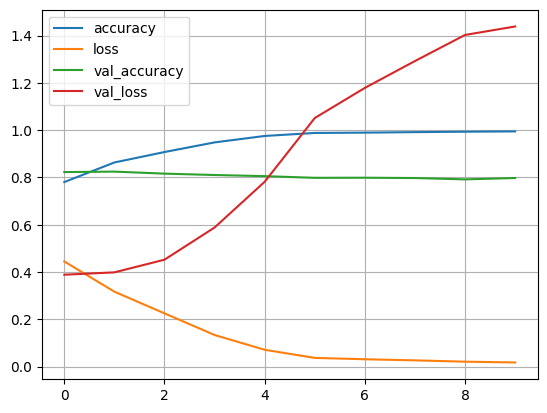

In [35]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Cargar el dataset
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
print(df.describe())
print("Total :\n", df['sentiment'].value_counts())

# Preprocesamiento de las reseñas
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

# Conversión de etiquetas a valores binarios
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

# Tokenización y padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2000
max_length = 150
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Construcción del modelo
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

# Evaluación del modelo
predictions = (model.predict(test_padded) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(test_labels, predictions)
print("Reporte de Clasificación:\n", class_report)

# Cálculo del F1-score
f1 = f1_score(test_labels, predictions)
print("F1-Score:", f1)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 210s 162ms/step - accuracy: 0.7049 - loss: 0.5544 - val_accuracy: 0.8192 - val_loss: 0.4020
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 106ms/step - accuracy: 0.8331 - loss: 0.3876 - val_accuracy: 0.8297 - val_loss: 0.4041
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 104ms/step - accuracy: 0.8427 - loss: 0.3573 - val_accuracy: 0.8180 - val_loss: 0.4008
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 109ms/step - accuracy: 0.8511 - loss: 0.3480 - val_accuracy: 0.8372 - val_loss: 0.3673
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 110ms/step - accuracy: 0.8661 - loss: 0.3188 - val_accuracy: 0.8417 - val_loss: 0.3638
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.8748 - loss: 0.2978 - val_accuracy: 0.8449 - val_loss: 0.3641
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 111ms/step - accuracy: 0.8827 - loss: 0.2815 - val_accuracy: 0.8503 - val_loss: 0.3665
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 112ms/step - ac

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (32, 150, 16)          │        32,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (32, 150, 64)          │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (32, 32)               │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 64)               │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,329 (263.00 KB)

 Trainable params: 67,329 (263.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 98ms/step - accuracy: 0.8594 - loss: 0.3287 - val_accuracy: 0.8503 - val_loss: 0.3808
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 120s 96ms/step - accuracy: 0.8837 - loss: 0.2719 - val_accuracy: 0.8501 - val_loss: 0.3527
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 124s 99ms/step - accuracy: 0.8892 - loss: 0.2635 - val_accuracy: 0.8533 - val_loss: 0.3682
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 120s 96ms/step - accuracy: 0.8987 - loss: 0.2483 - val_accuracy: 0.8372 - val_loss: 0.3657
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 98ms/step - accuracy: 0.9071 - loss: 0.2326 - val_accuracy: 0.8490 - val_loss: 0.3759
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 122s 97ms/step - accuracy: 0.9132 - loss: 0.2179 - val_accuracy: 0.8485 - val_loss: 0.3680
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 96ms/step - accuracy: 0.9129 - loss: 0.2212 - val_accuracy: 0.8430 - val_loss: 0.3918
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 100ms/step - accuracy:

<Axes: >

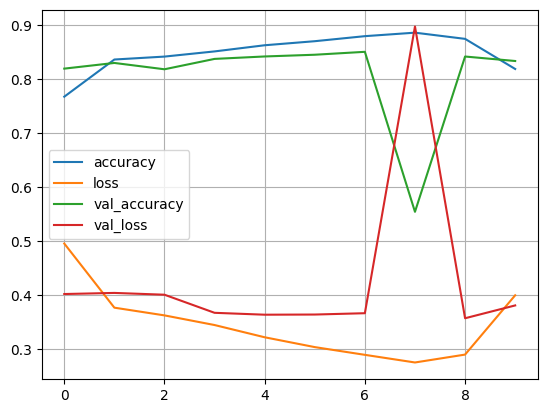

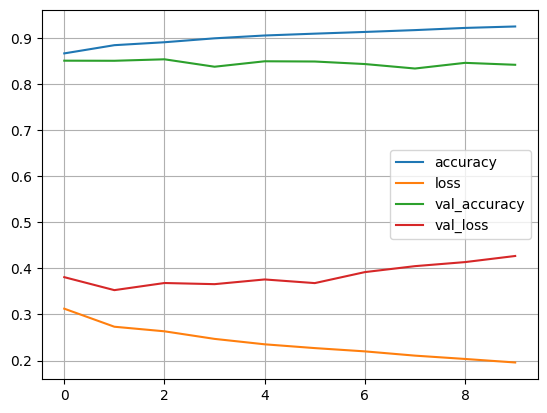

In [2]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Cargar el dataset
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
print(df.describe())
print("Total :\n", df['sentiment'].value_counts())

# Preprocesamiento de las reseñas
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

# Conversión de etiquetas a valores binarios
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

# Tokenización y padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2000
max_length = 150
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Construcción del modelo
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])




model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()


num_epochs = 10


history = model.fit(padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(test_padded, test_labels))
# Graficar el historial de entrenamiento: 
pd.DataFrame(history.history).plot(grid=True)

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

# Evaluación del modelo
predictions = (model.predict(test_padded) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(test_labels, predictions)
print("Reporte de Clasificación:\n", class_report)

# Cálculo del F1-score
f1 = f1_score(test_labels, predictions)
print("F1-Score:", f1)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 341s 268ms/step - accuracy: 0.5581 - loss: 0.6767 - val_accuracy: 0.6852 - val_loss: 0.6215
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 349s 279ms/step - accuracy: 0.5611 - loss: 0.6785 - val_accuracy: 0.5409 - val_loss: 0.6902
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 288s 230ms/step - accuracy: 0.5398 - loss: 0.6869 - val_accuracy: 0.5260 - val_loss: 0.6907
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 313s 250ms/step - accuracy: 0.5328 - loss: 0.6873 - val_accuracy: 0.6354 - val_loss: 0.6506
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 466s 373ms/step - accuracy: 0.6459 - loss: 0.6264 - val_accuracy: 0.7991 - val_loss: 0.4366
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 561s 449ms/step - accuracy: 0.8164 - loss: 0.4235 - val_accuracy: 0.8213 - val_loss: 0.3966
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 332s 266ms/step - accuracy: 0.8445 - loss: 0.3640 - val_accuracy: 0.8349 - val_loss: 0.3629
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 307s 246ms/step - ac

<Axes: >

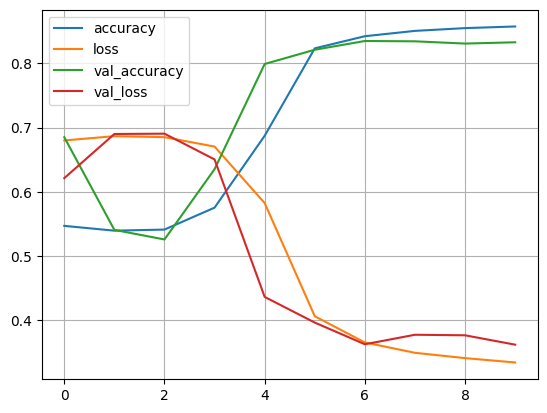

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Cargar el dataset
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
print(df.describe())
print("Total :\n", df['sentiment'].value_counts())

# Preprocesamiento de las reseñas
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

# Conversión de etiquetas a valores binarios
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

# Tokenización y padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2000
max_length = 150
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Construcción del modelo
from tensorflow import keras



model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.Dropout(0.25),
    keras.layers.LSTM(64),
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

# Evaluación del modelo
predictions = (model.predict(test_padded) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(test_labels, predictions)
print("Reporte de Clasificación:\n", class_report)

# Cálculo del F1-score
f1 = f1_score(test_labels, predictions)
print("F1-Score:", f1)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [3]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Cargar el dataset
df = pd.read_csv("IMDB Dataset SPANISH.csv")
print(df.head())
print(df.describe())
print("Total :\n", df['sentiment'].value_counts())

   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment sentimiento  
0  Uno de los otros críticos ha mencionado que de...  positive    positivo  
1  Una pequeña pequeña producción.La técnica de f...  positive    positivo  
2  Pensé que esta era una manera maravillosa de p...  positive    positivo  
3  Básicamente, hay una familia donde un niño peq...  negative    negativo  
4  El "amor en el tiempo" de Petter Mattei es una...  positive    positivo  
         Unnamed: 0
count  50000.000000
mean   24999.500000
std    14433.901067
min        0.000000
25%    12499.750000
50%    24

In [4]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("IMDB Dataset SPANISH.csv")

# Eliminar las columnas 'review_en' y 'sentiment'
df = df.drop(columns=['review_en', 'sentiment'])

# Verificar las primeras filas para confirmar que se eliminaron las columnas
print(df.head())


   Unnamed: 0                                          review_es sentimiento
0           0  Uno de los otros críticos ha mencionado que de...    positivo
1           1  Una pequeña pequeña producción.La técnica de f...    positivo
2           2  Pensé que esta era una manera maravillosa de p...    positivo
3           3  Básicamente, hay una familia donde un niño peq...    negativo
4           4  El "amor en el tiempo" de Petter Mattei es una...    positivo


   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment sentimiento  
0  Uno de los otros críticos ha mencionado que de...  positive    positivo  
1  Una pequeña pequeña producción.La técnica de f...  positive    positivo  
2  Pensé que esta era una manera maravillosa de p...  positive    positivo  
3  Básicamente, hay una familia donde un niño peq...  negative    negativo  
4  El "amor en el tiempo" de Petter Mattei es una...  positive    positivo  
         Unnamed: 0
count  50000.000000
mean   24999.500000
std    14433.901067
min        0.000000
25%    12499.750000
50%    24

c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6586 - loss: 0.5795 - val_accuracy: 0.7992 - val_loss: 0.4290
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8429 - loss: 0.3491 - val_accuracy: 0.8049 - val_loss: 0.4272
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9066 - loss: 0.2348 - val_accuracy: 0.7889 - val_loss: 0.4977
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9487 - loss: 0.1413 - val_accuracy: 0.7771 - val_loss: 0.6370
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9738 - loss: 0.0776 - val_accuracy: 0.7784 - val_loss: 0.8480
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9876 - loss: 0.0426 - val_accuracy: 0.7709 - val_loss: 1.1271
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9932 - loss: 0.0268 - val_accuracy: 0.7726 - val_loss: 1.2507
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9918 - loss: 0.0270 - 

<Axes: >

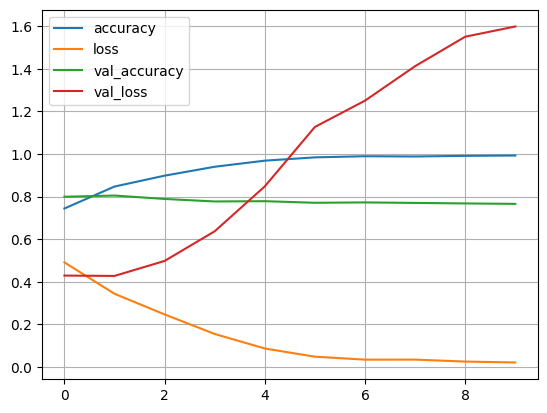

In [6]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Cargar el dataset
df = pd.read_csv("IMDB Dataset SPANISH.csv")
print(df.head())
print(df.describe())
print("Total :\n", df['sentimiento'].value_counts())

# Preprocesamiento de las reseñas
review = []
sentences = list(df['review_es'])
for sen in sentences:
    review.append(sen)

# Conversión de etiquetas a valores binarios
labels = df['sentimiento']
labels = np.array(list(map(lambda x: 1 if x=="positivo" else 0, labels)))

# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

# Tokenización y padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2000
max_length = 150
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Construcción del modelo
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

# Evaluación del modelo
predictions = (model.predict(test_padded) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(test_labels, predictions)
print("Reporte de Clasificación:\n", class_report)

# Cálculo del F1-score
f1 = f1_score(test_labels, predictions)
print("F1-Score:", f1)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [8]:
pip install pyarrow


   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB 217.9 kB/s eta 0:01:56
   ---------------------------------------- 0.1/25.1 MB 409.6 kB/s eta 0:01:02
    --------------------------------------- 0.5/25.1 MB 2.4 MB/s eta 0:00:11
   -- ------------------------------------- 1.5/25.1 MB 6.2 MB/s eta 0:00:04
   ---- ----------------------------------- 2.6/25.1 MB 8.6 MB/s eta 0:00:03
   ----- ---------------------------------- 3.5/25.1 MB 10.2 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/25.1 MB 11.5 MB/s eta 0:00:02
   -------- ------------------------------- 5.4/25.1 MB 12.4 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/25.1 MB 13.0 MB/s eta 0:00:02
   ----------- ---------------------------- 7.3/25.1 MB 13.7 MB/s eta 0:00:02
   --------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

# Cargar el dataset desde un archivo Parquet
df = pd.read_parquet("reviews_limpio.parquet")

# Verificar las primeras filas para confirmar que se eliminaron las columnas
print(df.head())


                 user_id            name       time  rating  \
0  113712248430587773659  Liz Caratachea 2021-07-18       3   
1  113918395476134636613      V Macinnis 2021-05-09       5   
2  107847800790945286690     Anders Berg 2021-07-28       5   
3  102355737387813698401  Addis Williams 2019-03-10       5   
4  110945887724483015846   Jeremy Rogers 2019-03-12       5   

                                                text  \
0  Nice place but this is Brigittes last laugh\nN...   
1  The best karaoke I've been to. Its like watchi...   
2  Great Karaoke in N. Phoenix with many song cho...   
3  Ever since this place's new ownership, the cro...   
4       We had a blast.  Beer was nice and cold too.   

                                                resp  \
0  {'text': 'Yes. Our Karaoke Company is inside B...   
1  {'text': 'Thanks for your kind review. I hope ...   
2  {'text': 'Thanks for your kind review Anders
H...   
3  {'text': 'Thanks Addis
🎩 Glad you had a good t...   
4  {

c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2917 - loss: 0.6983 - val_accuracy: 0.6667 - val_loss: 0.6771
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7500 - loss: 0.6453 - val_accuracy: 0.6667 - val_loss: 0.6644
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7500 - loss: 0.6107 - val_accuracy: 0.6667 - val_loss: 0.6613
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.7500 - loss: 0.5798 - val_accuracy: 0.6667 - val_loss: 0.6699
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7500 - loss: 0.5541 - val_accuracy: 0.6667 - val_loss: 0.6916
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7500 - loss: 0.5384 - val_accuracy: 0.6667 - val_loss: 0.7220
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7500 - loss: 0.5331 - val_accuracy: 0.6667 - val_loss: 0.7480
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7500 - loss: 0.5322 - val_accuracy: 0.6667 - val_loss: 0.

<Axes: >

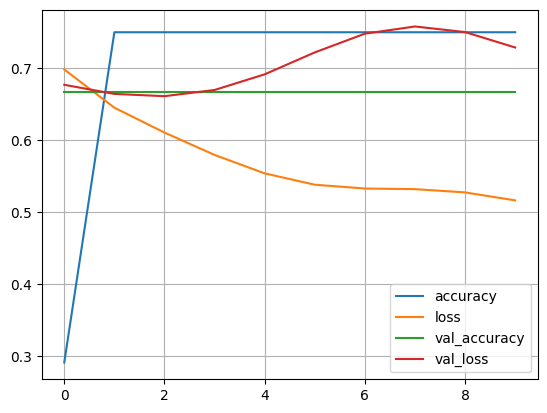

In [11]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Cargar el dataset
df = pd.read_parquet("reviews_limpio.parquet")  # Ajuste para leer el archivo parquet

# Preprocesamiento de las reseñas
reviews = df['text'].tolist()  # Usar la columna 'text'
ratings = df['rating'].values  # Usar la columna 'rating'

# Conversión de etiquetas a valores binarios (en este caso, consideraremos que ratings >= 4 es positivo)
labels = np.array([1 if rating >= 4 else 0 for rating in ratings])

# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.20)

# Tokenización y padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 2000
max_length = 150
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Construcción del modelo
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

# Evaluación del modelo
predictions = (model.predict(test_padded) > 0.5).astype("int32")

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(test_labels, predictions)
print("Reporte de Clasificación:\n", class_report)

# Cálculo del F1-score
f1 = f1_score(test_labels, predictions)
print("F1-Score:", f1)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)
